In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of Carvana Data

In [13]:
carvana = pd.read_csv('datasets/carvana_cleaned.csv')
pd.set_option('display.max_columns', None)
carvana.head()

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement
0,https://www.carvana.com/vehicle/2004050,2004050,Nissan,Sentra,18990,2017,Sedan,Available,27633,S Sedan 4D,2021-10-09 13:10:07,14450 West Rd,Houston,TX,77041,27.0,37.0,4.0,"4-Cyl, 1.8 Liter",NaN,NaN,Gas,FWD,Silver,"Auto, CVT w/Xtronic",4,5,3N1AB7AP2HY321285,2001283529,2857,18975,NaN
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206,25555,NaN
2,https://www.carvana.com/vehicle/2027280,2027280,Volkswagen,Jetta,19590,2019,Sedan,Available,43649,1.4T S Sedan 4D,2021-10-09 13:10:11,63 Pierce Rd,Winder,GA,30680,30.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 8-Spd & Tiptronic",4,5,3VWC57BU8KM127308,2001316091,2970,20240,1.4
3,https://www.carvana.com/vehicle/1834450,1834450,Nissan,Versa,16590,2019,Sedan,Available,31887,S Sedan 4D,2021-10-09 13:11:19,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,36.0,4.0,"4-Cyl, 1.6 Liter",109.0,107.0,Gas,FWD,Black,"Manual, 5-Spd",4,5,3N1CN7AP5KL822420,2001053561,2395,13385,1.6
4,https://www.carvana.com/vehicle/2004398,2004398,Chevrolet,Cruze,18590,2018,Sedan,Available,19363,LS Sedan 4D,2021-10-09 13:11:21,1925 Concord Pkwy S,Concord,NC,28027,29.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",153.0,177.0,Gas,FWD,Silver,"Automatic, 6-Spd",4,5,1G1BC5SM7J7198252,2001287434,0,21995,1.4


In [11]:
carvana.shape

(329, 32)

# Analysis

I am sharing the belief that every dataset is cleansed and prepared for _something_, some purpose. 
Using this dataset, I will try to answer some questions about Carvana data, namely:

- what affects the price of a car the most (my guess it's the year, we will see)
- which brand ("make") has the highest depreciation rate, and which has the lowest (I assume that would be German and Japaneese cars respectively)
- what brand has the biggest average engine displacement (some American car brand for sure)
- what car brand is the most often occuring in this dataset (hard to say)
- does a transmission type affects a price of a car (there is a belief that no one can drive stickshift, therefore they go for cheap)
- is there a relationship between drivetrain and a body style (for example, if it's FWD, that's most likely a sedan, RWD is either a truck or a coupe)
- what is the most common color of the car (gotta be black)
- what is the cheapest and the most expensive car in this dataset for each brand
- which car brand has the highest average horsepower (American, likely)
- which car brand and model has the highest MPG (most likely Japanese)

# Correlation matrix & heatmap

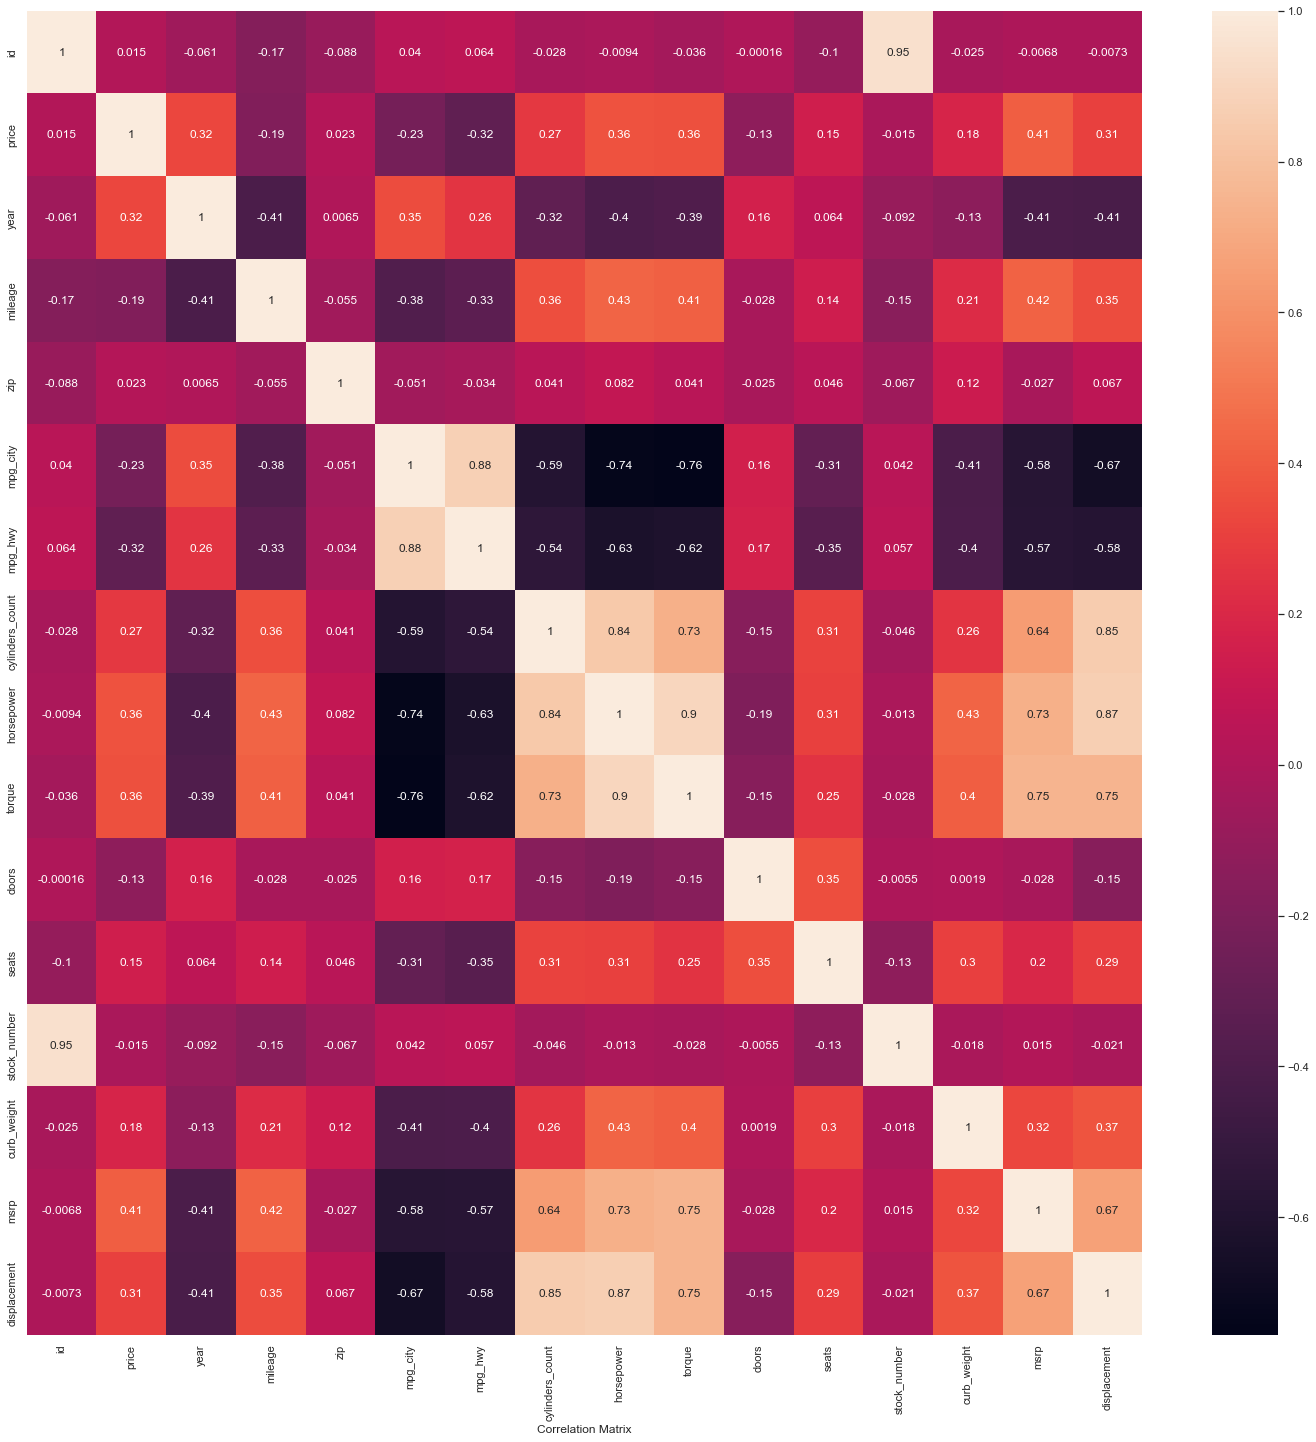

In [16]:
sns.heatmap(carvana.corr(), annot =True )
sns.set(rc = {'figure.figsize':(40,40)})
plt.tight_layout()
plt.xlabel('Correlation Matrix')
plt.show()

<u>**Linear**</u> correlations (negative or positive):
- stock number & ID (makes sense, they have to be somehow related)
- displacement & City MPG. The more displacement, the less is City MPG
- torque & City MPG. The more the torque, the less is City MPG
- cylinders count & City MPG, the more the cylinders count, the less it the City MPG
- horsepower & City MPG, the more the horsepower, the less is City MPG
- horsepower, torque, displacement, and cylinder count have similar relationship to Hwy MPG.

- horsepower affects msrp strongly positively (0.73), while it doesn't affect the price that strong (0.36). **Do high-HP cars depreciate fast?** 
- curb weight has some weak effect on MPG (-0.4). The heavier the car, the less is the MPG.
- year has some weak effect on mileage (-0.4). The newer the car, the lesser is the mileage.
- mileage has very weak effect on price (-0.19). More miles affects the car price, but not as strong as year or horsepower.

### Limitations:

Pearson's Correlation Coefficient shows only how strong one parameter related to another linearly. In other words, if the relationship is not linear (for example, U-shaped), it might not be representing this relationship well. 

Therefore, to better see the relationships, I will use a seaborn.pairplot.

Before doing so, I would reduce the number of numerical columns since a lot of them are tightly related and would contaminate the graph
(speaking of **torque**-**horsepower**-**displacement**)

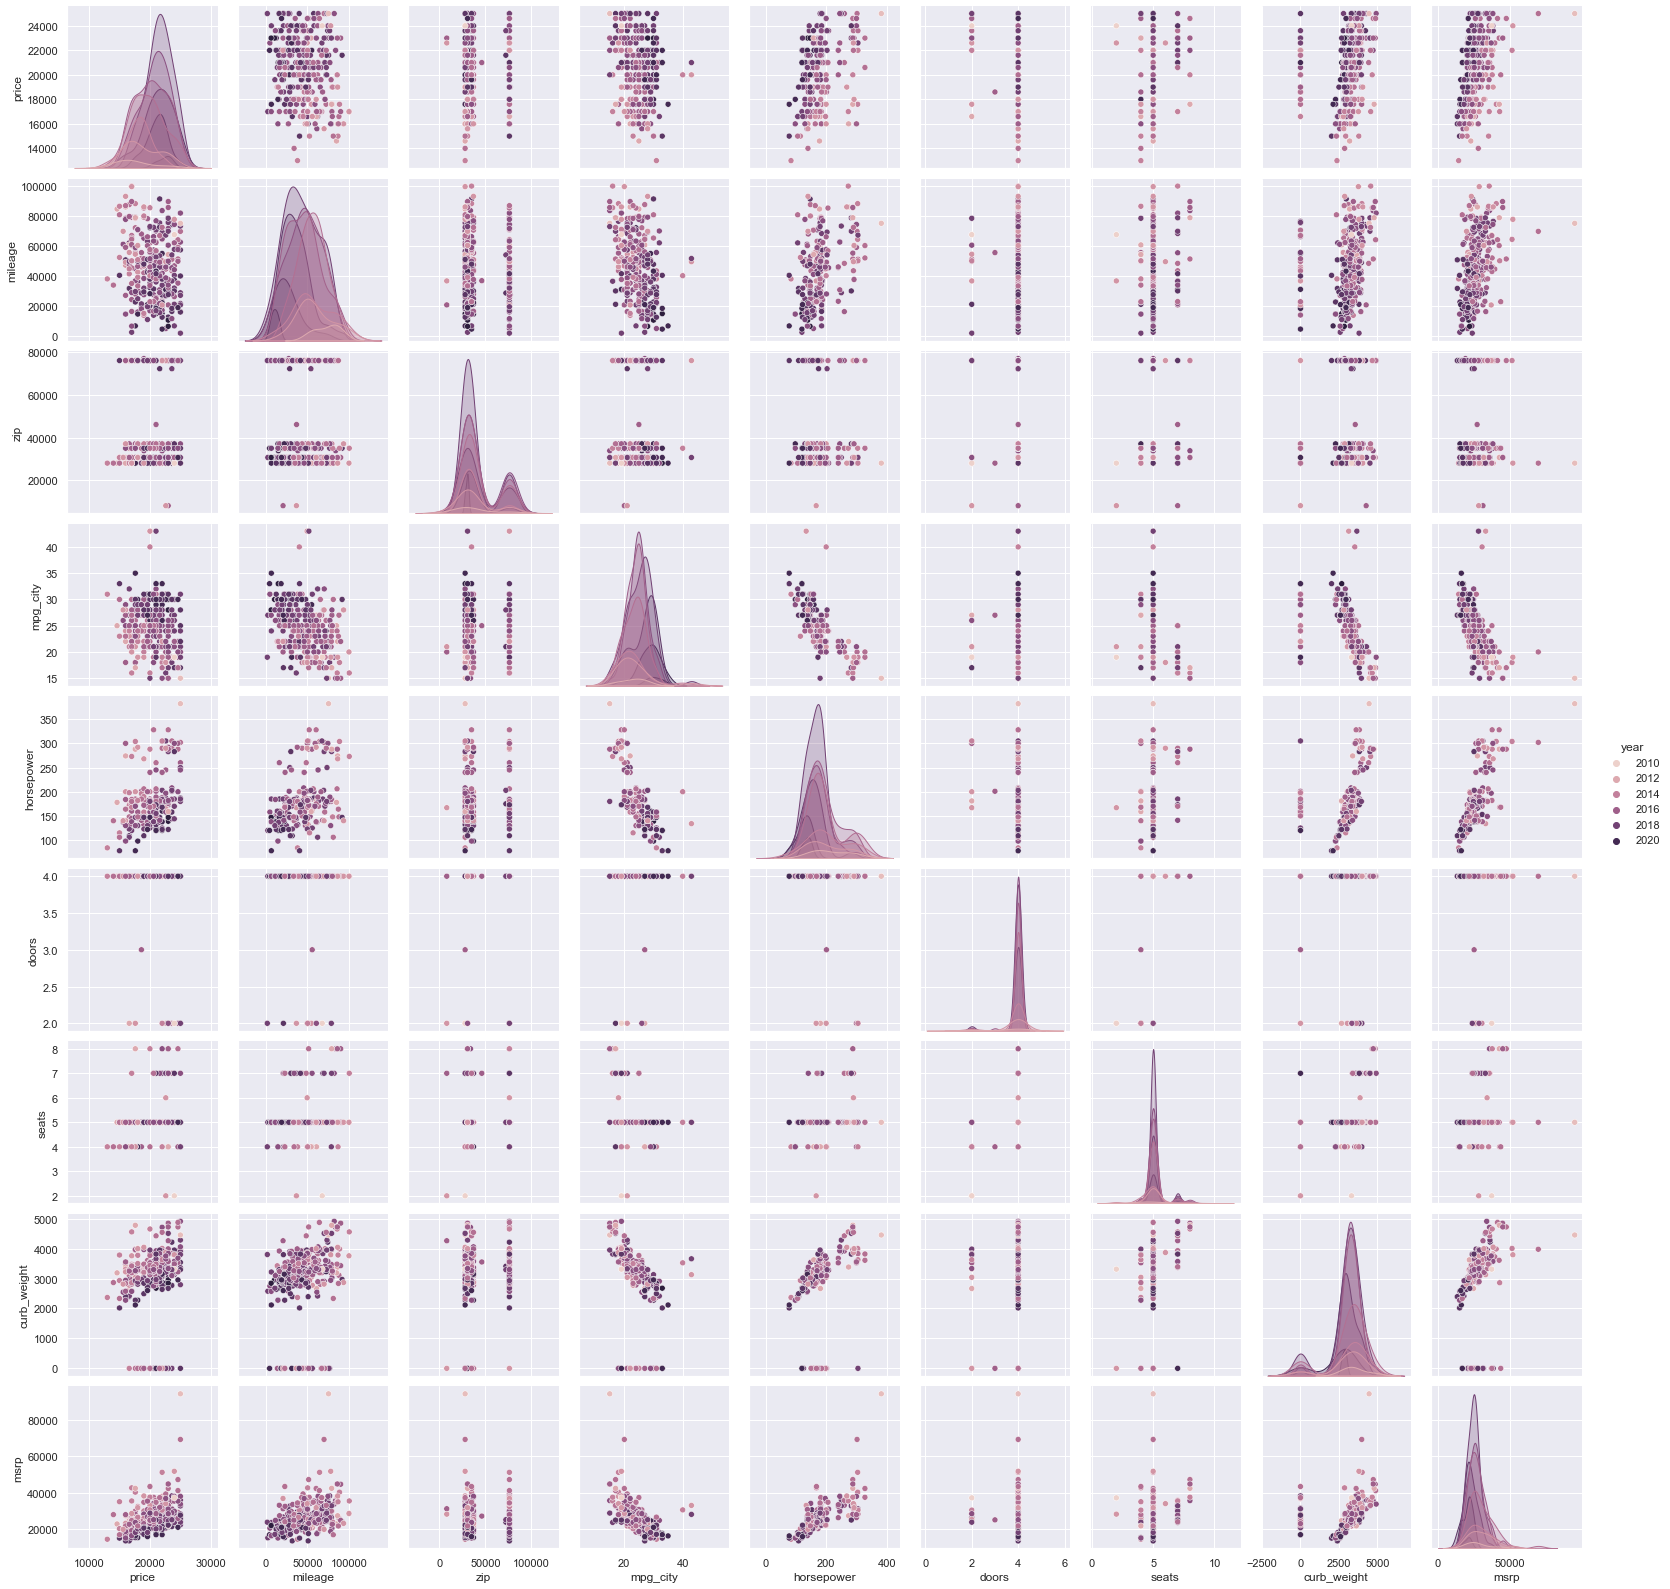

In [31]:
carvana_reduced = carvana.drop(['mpg_hwy', 'cylinders_count', 'torque', 'displacement', 'id', 'stock_number'], axis=1)

sns.pairplot(carvana_reduced, hue='year')

There are some conclusions to be made from this plot:

- **seems like more recent cars have lesser average curb weight?**
- mileage alone indeed has no visible relationship with price (wow!)
- MPG has a very clear linear relationship with curb weight
- **seems like cars made in 2016-2018 have the highest average mileage?**
- price is somewhat affected by the horsepower

## What affects the price of a car?

Based on acquired data, those are all linear correlations between columns sorted from positive to negative:

In [61]:
carvana.corr()['price'].sort_values(ascending=False)

price              1.000000
msrp               0.405682
horsepower         0.362221
torque             0.361491
year               0.321102
displacement       0.305637
cylinders_count    0.268525
curb_weight        0.180684
seats              0.146227
zip                0.022705
id                 0.015417
stock_number      -0.015312
doors             -0.131636
mileage           -0.185601
mpg_city          -0.228736
mpg_hwy           -0.318230
Name: price, dtype: float64

However, this output needs to be slightly modified. 

We don't need **price**, since correlation with itself will always be 1.

**id** and **stock_number** are useless (they also show no correlation whatsoever, which is expectable)

Lastly, we are interest what contributes to the price the most, and not the sign of this correlation.

Therefore:


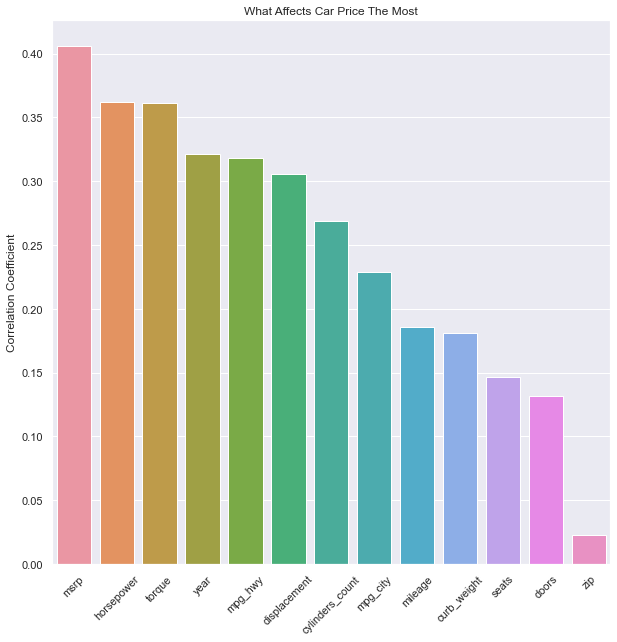

In [62]:
price_affect = abs(carvana.corr()['price']).sort_values(ascending=False)

price_affect = pd.DataFrame(price_affect).transpose()
price_affect.drop(['price', 'id', 'stock_number'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=price_affect)
ax.set_xticklabels(price_affect.columns, rotation = 45)
ax.set_title("What Affects Car Price The Most")
ax.set_ylabel('Correlation Coefficient')
plt.show()

### Conclusions:
- the most affecting factor is **MSRP**. The more expensive the car from the factory, the more expensive after it will be
- surprisingly, second & third place belong to **horsepower** and **torque**. People _love_ gaz guzzlers and are ready to pay more for them!
- next goes the **year**, followed by **gas mileage on a highway**. Give me the horsepower, but make it efficient
- an odometer reading, **mileage**, is on the 9th place. I have a hypothesis that mileage has more effect on same-year cars, but might not be as important for the price across the board

In [35]:
carvana.groupby(['year']).agg('mean').sort_values(by=['curb_weight'], ascending=False)

,id,price,mileage,zip,mpg_city,mpg_hwy,cylinders_count,horsepower,torque,doors,seats,stock_number,curb_weight,msrp,displacement
year,,,,,,,,,,,,,,,
2011,1.959361e+06,24990.000000,75392.000000,28027.000000,15.000000,23.000000,8.000000,382.000000,391.000000,4.000000,5.000000,2.001231e+09,4455.000000,94525.000000,5.500000
2012,1.978404e+06,17550.000000,73170.200000,38178.400000,22.750000,32.000000,4.400000,216.000000,213.200000,3.600000,5.200000,2.001247e+09,3529.600000,27715.000000,2.480000
2010,2.004124e+06,23990.000000,67816.000000,28027.000000,19.000000,26.000000,6.000000,NaN,NaN,2.000000,2.000000,2.001284e+09,3314.000000,37130.000000,3.700000
2014,1.987648e+06,18056.666667,56581.476190,38185.333333,22.526316,30.684211,4.631579,204.058824,195.312500,3.904762,5.047619,2.001265e+09,3211.285714,29251.809524,2.600000
2017,1.964434e+06,20772.456140,46082.175439,44218.000000,24.563636,33.163636,4.178571,171.838710,175.161290,3.964912,5.175439,2.001221e+09,3196.087719,25725.894737,1.983784
2016,1.967108e+06,20262.727273,45543.909091,42014.018182,23.648148,32.629630,4.327273,193.102564,188.076923,3.945455,5.145455,2.001230e+09,3173.454545,26760.981818,2.190698
2015,1.973266e+06,19653.636364,55059.568182,43442.795455,23.400000,32.725000,4.523810,200.000000,196.058824,3.954545,5.159091,2.001237e+09,3049.477273,30117.386364,2.578378
2019,1.961484e+06,21335.000000,35871.175000,43032.525000,26.425000,34.575000,4.025000,153.500000,149.791667,3.950000,5.100000,2.001221e+09,3010.925000,22437.875000,1.977419
2013,1.960124e+06,18927.500000,58873.312500,38198.250000,23.187500,31.250000,4.625000,199.500000,188.333333,3.750000,4.812500,2.001225e+09,2986.125000,29931.875000,2.542857


In [36]:
carvana.groupby(['year']).agg('mean').sort_values(by=['mileage'], ascending=False)

,id,price,mileage,zip,mpg_city,mpg_hwy,cylinders_count,horsepower,torque,doors,seats,stock_number,curb_weight,msrp,displacement
year,,,,,,,,,,,,,,,
2011,1.959361e+06,24990.000000,75392.000000,28027.000000,15.000000,23.000000,8.000000,382.000000,391.000000,4.000000,5.000000,2.001231e+09,4455.000000,94525.000000,5.500000
2012,1.978404e+06,17550.000000,73170.200000,38178.400000,22.750000,32.000000,4.400000,216.000000,213.200000,3.600000,5.200000,2.001247e+09,3529.600000,27715.000000,2.480000
2010,2.004124e+06,23990.000000,67816.000000,28027.000000,19.000000,26.000000,6.000000,NaN,NaN,2.000000,2.000000,2.001284e+09,3314.000000,37130.000000,3.700000
2013,1.960124e+06,18927.500000,58873.312500,38198.250000,23.187500,31.250000,4.625000,199.500000,188.333333,3.750000,4.812500,2.001225e+09,2986.125000,29931.875000,2.542857
2014,1.987648e+06,18056.666667,56581.476190,38185.333333,22.526316,30.684211,4.631579,204.058824,195.312500,3.904762,5.047619,2.001265e+09,3211.285714,29251.809524,2.600000
2015,1.973266e+06,19653.636364,55059.568182,43442.795455,23.400000,32.725000,4.523810,200.000000,196.058824,3.954545,5.159091,2.001237e+09,3049.477273,30117.386364,2.578378
2017,1.964434e+06,20772.456140,46082.175439,44218.000000,24.563636,33.163636,4.178571,171.838710,175.161290,3.964912,5.175439,2.001221e+09,3196.087719,25725.894737,1.983784
2016,1.967108e+06,20262.727273,45543.909091,42014.018182,23.648148,32.629630,4.327273,193.102564,188.076923,3.945455,5.145455,2.001230e+09,3173.454545,26760.981818,2.190698
2018,1.964318e+06,21445.882353,43003.205882,39665.000000,25.218750,33.093750,4.176471,172.428571,170.183673,3.941176,5.088235,2.001223e+09,2972.250000,24790.661765,2.105769


In [8]:
carvana.groupby('make')['price'].agg('mean').sort_values()

make
Chrysler         18390.000000
Mitsubishi       18710.000000
Scion            18990.000000
Hyundai          19246.000000
Bmw              19323.333333
Kia              19460.588235
Mini             19723.333333
Volkswagen       19865.000000
Chevrolet        20002.500000
Subaru           20023.333333
Ford             20047.142857
Nissan           20551.111111
Toyota           20882.857143
Honda            20932.857143
Buick            21305.789474
Acura            21356.666667
Jeep             21400.526316
Mazda            21770.000000
Lincoln          21990.000000
Cadillac         21990.000000
Lexus            21990.000000
Infiniti         22290.000000
Gmc              22323.333333
Dodge            23270.000000
Audi             24090.000000
Mercedes-benz    24990.000000
Name: price, dtype: float64